In [1]:
import xarray as xr
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import geopandas as gpd

%matplotlib inline

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [ ]:
# pip install datetime

In [ ]:
# import stolle at al data, plot stuff

In [74]:
stolle = pd.read_csv('catchments/Stolleetal2013.csv', sep = ';', index_col = 0)

stolle.columns = ['Type', 'Hmin_m', 'Hmax_m', 'Hmean_m', 'Catchment_Area_km', 
                  'FL_m', 'FS_in', 'EZGL_m', 'EZGS_in', 'Rlf', 'Meltons_R', 'Form',
                  'Cplan', 'Cpro', 'ksn_m09', 'star']

In [59]:
stolle.head()

,Type,Hmin_m,Hmax_m,Hmean_m,Catchment_Area_km,FL_m,FS_in,EZGL_m,EZGS_in,Rlf,Meltons_R,Form,Cplan,Cpro,ksn_m09,star
ID,,,,,,,,,,,,,,,,
1,F,4173,5842,5113,42684894.0,1105,8.80,10577,8.97,0.158,0.255,0.435,0.01772,0.01789,84.78,NaN
2,F,4404,5872,5198,7754.4,1461,14.73,5179,15.82,0.283,0.527,0.340,0.02270,0.02485,71.89,NaN
3,DF,4232,5057,4613,1574675.0,842,15.47,1932,23.12,0.427,0.657,0.485,0.01270,-0.04892,127.25,*
4,DF,4158,5194,4750,1327.5,752,16.24,1920,28.35,0.539,0.899,0.414,-0.00975,-0.01577,150.38,NaN
5,F,3823,5885,4945,40680.0,907,4.41,9467,12.29,0.218,0.323,0.524,0.00777,0.00805,137.60,NaN


In [29]:
# plot stuff 

# plt.figure(figsize=(10, 10))

# sns.scatterplot(data=stolle, x=" Hmean_m", y="Meltons_R", hue="Typ ")

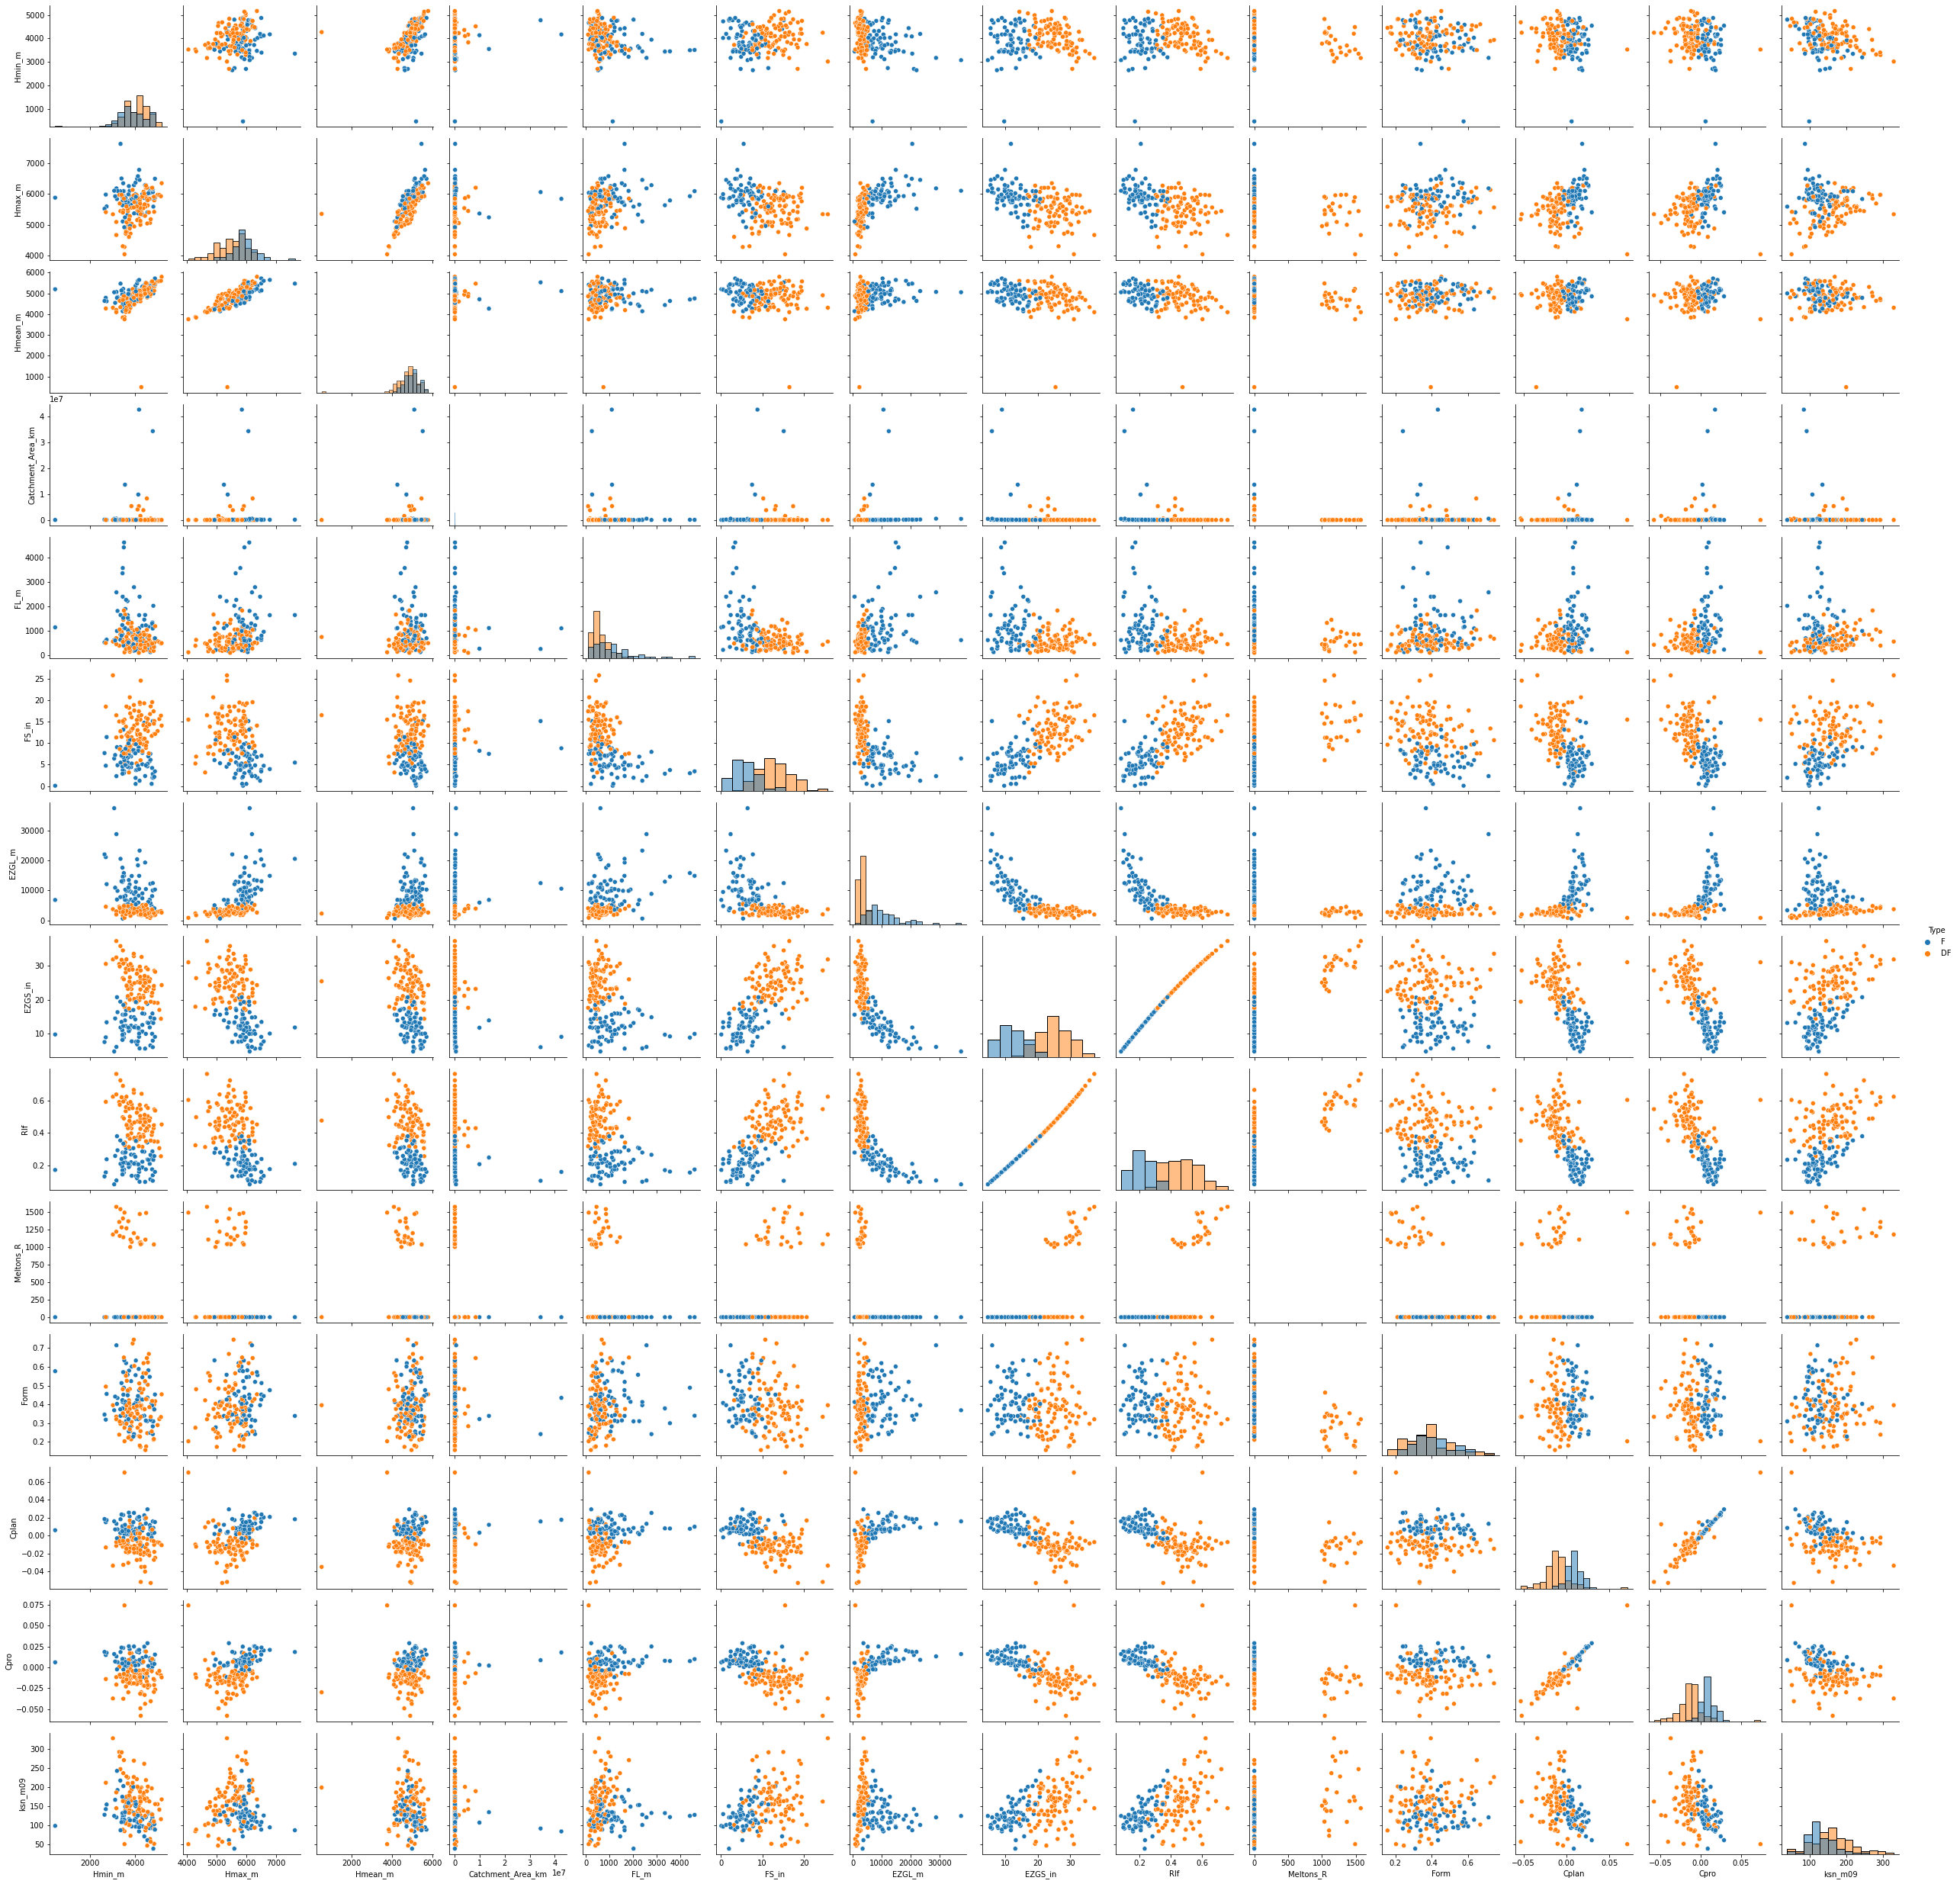

In [73]:
# histograms and other stuff 

g = sns.PairGrid(stolle, hue="Type")

g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

# g = sns.FacetGrid(tips, col="sex", hue="smoker")
# g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)


# plt.savefig('stolle2013_scatter.png', dpi = 300, bbox_inches = 'tight')

In [72]:
# sns.displot(stolle, x="Catchment_Area_km", hue="Type")
# sns.displot(stolle, x="Meltons_R", hue = "Type")
# stolle.Catchment_Area_km.scatterplot()

### shp file to merge with other stuff

In [92]:
stolle_shp = gpd.read_file('catchments/stolle_et_al_catchments_centroids.shp')
stolle_shp = pd.DataFrame(stolle_shp)


In [96]:
stolle.sort_values("Catchment_Area_km")

,Type,Hmin_m,Hmax_m,Hmean_m,Catchment_Area_km,FL_m,FS_in,EZGL_m,EZGS_in,Rlf,Meltons_R,Form,Cplan,Cpro,ksn_m09,star
ID,,,,,,,,,,,,,,,,
107,DF,3531,4043,3759,117.9,123,15.45,848,31.12,0.604,1491.000,0.204,0.07076,0.07416,51.45,*
37,DF,4234,4999,4624,511.2,381,11.28,1800,23.03,0.425,1070.000,0.174,-0.00752,-0.00713,138.46,*
84,DF,3796,4713,4302,685.8,162,9.12,1551,30.59,0.591,1107.000,0.343,0.01479,-0.00213,73.48,*
65,DF,4486,5892,5216,893.7,426,15.86,2482,29.53,0.567,1487.000,0.176,-0.01977,-0.01249,165.76,NaN
25,DF,3700,4999,4400,901.8,885,10.62,2227,30.25,0.583,1368.000,0.223,-0.03071,-0.02972,109.76,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,DF,4519,6204,5473,8337414.0,1039,10.20,3931,23.20,0.429,0.584,0.647,-0.00972,-0.00700,190.12,NaN
81,F,4140,5366,4720,9848876.0,270,8.22,5938,11.67,0.206,0.391,0.322,0.00320,0.00298,107.89,NaN
103,F,3554,5240,4270,13647861.0,1116,7.50,6837,13.85,0.247,0.456,0.339,0.01207,0.00220,135.09,NaN


In [97]:
stolle_shp.sort_values("Area")

,Name,descriptio,timestamp,begin,end,altitudeMo,tessellate,extrude,visibility,drawOrder,icon,GridID,type,fan_length,fan_height,Area,x_centroid,y_centroid,geometry
24,None,None,None,None,None,None,-1,0,-1,None,None,173.0,debris,123.0,34.0,117783.0,77.912,33.759,POINT (77.91223 33.75938)
161,None,None,None,None,None,None,-1,0,-1,None,None,112.0,debris,558.0,168.0,238161.0,77.431,32.987,POINT (77.43050 32.98655)
162,None,None,None,None,None,None,-1,0,-1,None,None,114.0,debris,411.0,108.0,330281.0,77.462,32.958,POINT (77.46155 32.95780)
86,None,None,None,None,None,None,-1,0,-1,None,None,106.0,debris,381.0,76.0,511065.0,77.213,33.052,POINT (77.21276 33.05245)
166,None,None,None,None,None,None,-1,0,-1,None,None,133.0,debris,182.0,61.0,572918.0,78.216,32.771,POINT (78.21600 32.77069)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,None,None,None,None,None,None,-1,0,-1,None,None,233.0,fluvial,631.0,42.0,156709619.0,78.405,33.452,POINT (78.40549 33.45229)
130,None,None,None,None,None,None,-1,0,-1,None,None,89.0,fluvial,1652.0,68.0,173029492.0,78.169,33.850,POINT (78.16929 33.85046)
50,None,None,None,None,None,None,-1,0,-1,None,None,228.0,fluvial,2401.0,53.0,198466225.0,78.541,33.087,POINT (78.54059 33.08735)
103,None,None,None,None,None,None,-1,0,-1,None,None,46.0,fluvial,622.0,70.0,446237939.0,77.093,34.576,POINT (77.09278 34.57559)
